In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
X_train_scaled = pd.read_csv('X_train_scaled.csv')
X_test_scaled = pd.read_csv('X_test_scaled.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

(1020, 874) (255, 874) (1020, 1) (255, 1)


#Now, we use cross-validation to compare different values of k and find the best k

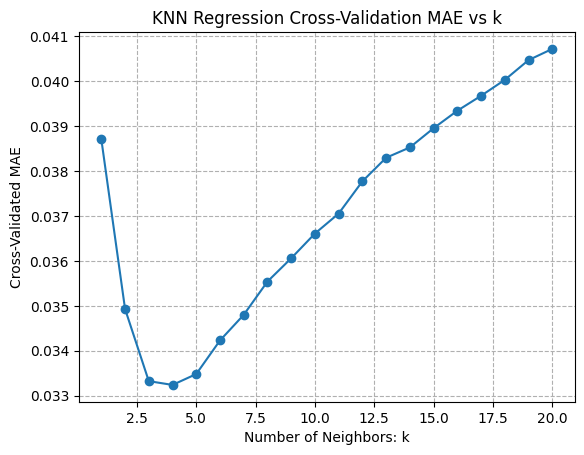

In [ ]:
# Range of k values to try
k_range = range(1, 21)
cv_mae = []

# Evaluate each k using 5-fold cross-validation
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')

    # Let cross_val_score returns NEGATIVE mae bc sklearn requires
    # all scores to follow "higher is better". But mae is "Lower is better".
    # So we convert it to negative.
    scores = cross_val_score(knn, X_train_scaled, y_train,
        cv=5, scoring='neg_mean_absolute_error')

    # Convert negative mae to positive
    mae = -scores.mean()
    cv_mae.append(mae)

# Plot mae vs k (lower mae is better)
plt.plot(k_range, cv_mae, marker='o')
plt.title("KNN Regression Cross-Validation MAE vs k")
plt.xlabel("Number of Neighbors: k")
plt.ylabel("Cross-Validated MAE")
plt.grid(True, linestyle='--')
plt.show()


In [ ]:
# Find the best K which has min mae
best_k = k_range[int(np.argmin(cv_mae))]
print(f"The best k is {best_k}")

The best k is 4


# We get the best k = 4. Now we now can fit the model and predict laptop prices

In [ ]:
# Build KNN with the best_k = 4
best_model = KNeighborsRegressor(
    n_neighbors=best_k,
    weights='distance'
)

# Fit the model by traing data
best_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = best_model.predict(X_test_scaled)

# Evaluation
print(f"Best k: {best_k}")
test_r2  = r2_score(y_test, y_pred)
print(f"Test R-squared Score: {test_r2:.4f}")
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error (MSE): {test_mse:.4f}")
test_rmse = np.sqrt(test_mse)
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.4f}")
test_mae = mean_absolute_error(y_test, y_pred)
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")

Best k: 4
Test R-squared Score: 0.8481
Test Mean Squared Error (MSE): 0.0021
Test Root Mean Squared Error (RMSE): 0.0463
Test Mean Absolute Error (MAE): 0.0329


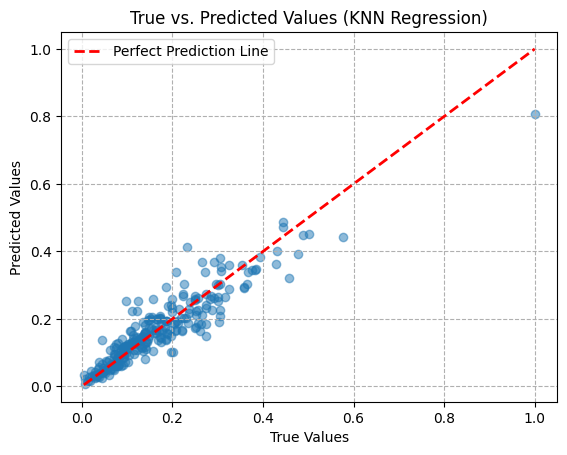

In [ ]:
# Plot true vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],
         color='red', linestyle='--', lw=2, label='Perfect Prediction Line')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values (KNN Regression)")
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

Result Summary:

We applied KNN regression with 5-fold cross-validation to tune the hyperparameter k.
And evaluated values of k from 1 to 20 using MAE as the validation metric and found that
k = 4 minimized the cross-validated MAE. Using this optimal k, the KNN model achieved
reliable predictive performance with a test R² = 0.8481, MAE = 0.0329, and MSE = 0.0021.
These results indicate that KNN performs well after feature scaling.
